In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Matrix inversion using Cholesky decomposition

In [ ]:
def naive_matrix_inverse(A):
    n = A.shape[0]
    det = np.linalg.det(A)
    adj = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            minor = np.delete(np.delete(A, i, axis=0), j, axis=1)
            minor_det = np.linalg.det(minor)
            cofactor = (-1) ** (i + j) * minor_det
            adj[j, i] = cofactor

    inverse = adj / det

    return inverse

In [ ]:
A = np.identity(4) * 1e-100
print(A)

[[1.e-100 0.e+000 0.e+000 0.e+000]
 [0.e+000 1.e-100 0.e+000 0.e+000]
 [0.e+000 0.e+000 1.e-100 0.e+000]
 [0.e+000 0.e+000 0.e+000 1.e-100]]


In [ ]:
# This suffers from numerical underflow issues
A_inv_naive = naive_matrix_inverse(A)
print("Naive")
print(A_inv_naive)

Naive
[[inf nan nan nan]
 [nan inf nan nan]
 [nan nan inf nan]
 [nan nan nan inf]]


<ipython-input-2-818a055353bc>:13: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-2-818a055353bc>:13: RuntimeWarning:

invalid value encountered in divide



In [ ]:
A = np.identity(4) * 1e-100

# This suffers from numerical underflow issues
A_inv_naive = naive_matrix_inverse(A)
print("Naive")
print(A_inv_naive)

# However, here we see that a "square root" reduce the magnitude of matrix entries, allowing for inversion
L = np.linalg.cholesky(A)
A_inv = naive_matrix_inverse(L) * naive_matrix_inverse(L.T)

print("Cholesky")
print(L)

print("Inv")
print(A_inv)

Naive
[[inf nan nan nan]
 [nan inf nan nan]
 [nan nan inf nan]
 [nan nan nan inf]]
Cholesky
[[1.e-50 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-50 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-50 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-50]]
Inv
[[1.e+100 0.e+000 0.e+000 0.e+000]
 [0.e+000 1.e+100 0.e+000 0.e+000]
 [0.e+000 0.e+000 1.e+100 0.e+000]
 [0.e+000 0.e+000 0.e+000 1.e+100]]


<ipython-input-2-818a055353bc>:13: RuntimeWarning: divide by zero encountered in divide
  inverse = adj / det
<ipython-input-2-818a055353bc>:13: RuntimeWarning: invalid value encountered in divide
  inverse = adj / det


## Sampling from a Gaussian using Cholesky decomposition

Some of you may have seen the famous "reparameterization trick" as seen in the image below [credit: [Wikipedia](https://en.wikipedia.org/wiki/File:Reparameterization_Trick.png) \]

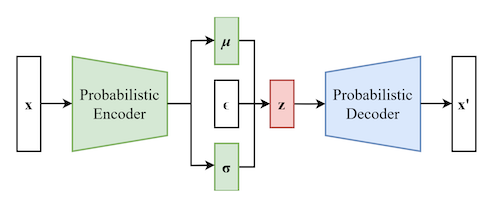

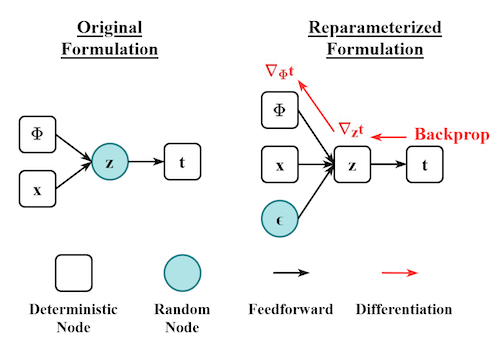

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)


mu = np.array([2, 3])
Sigma = np.array([[1.0, 0.8], [0.8, 1.0]])

n_samples = 100000

# Cholesky decomposition sampling
L = np.linalg.cholesky(Sigma)
z = np.random.randn(2, n_samples)  # Standard normal samples
samples_cholesky = mu[:, None] + L @ z  # Apply transformation
samples_cholesky = samples_cholesky.T  # Transpose for easier handling

# Standard multivariate normal sampling
samples_standard = np.random.multivariate_normal(mu, Sigma, n_samples)

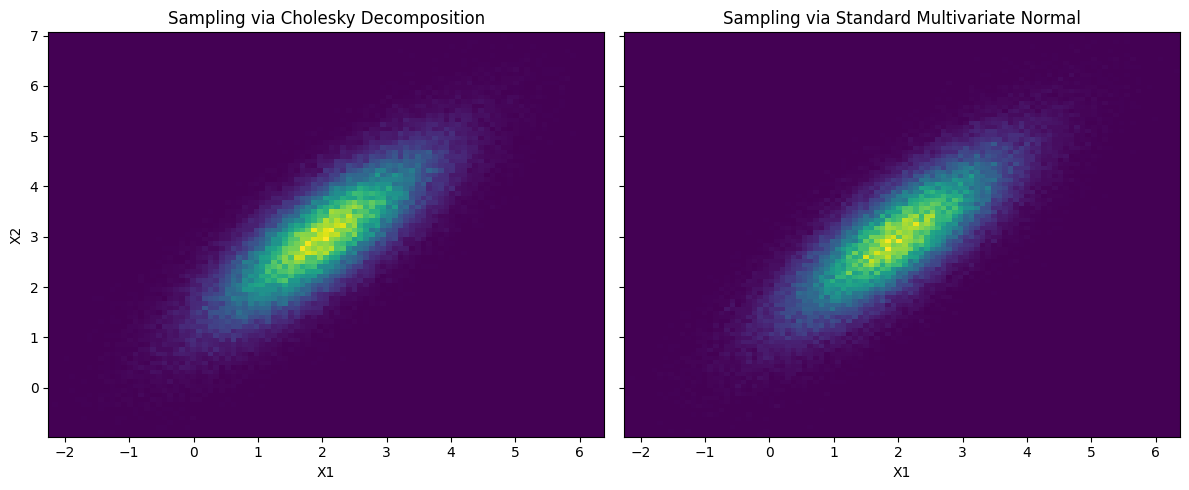

In [ ]:
# Plot histogram comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Plot Cholesky samples
axes[0].hist2d(samples_cholesky[:, 0], samples_cholesky[:, 1], bins=100, density=True)
axes[0].set_title("Sampling via Cholesky Decomposition")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

# Plot Standard Sampling
axes[1].hist2d(samples_standard[:, 0], samples_standard[:, 1], bins=100, density=True)
axes[1].set_title("Sampling via Standard Multivariate Normal")
axes[1].set_xlabel("X1")

plt.tight_layout()
plt.show()

## Visualizing 3D Surfaces

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

In [ ]:
# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Example function (multivariate Gaussian)
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
rv = multivariate_normal(mean, cov)

# Calculate the probability density function on the grid
Z = rv.pdf(pos)

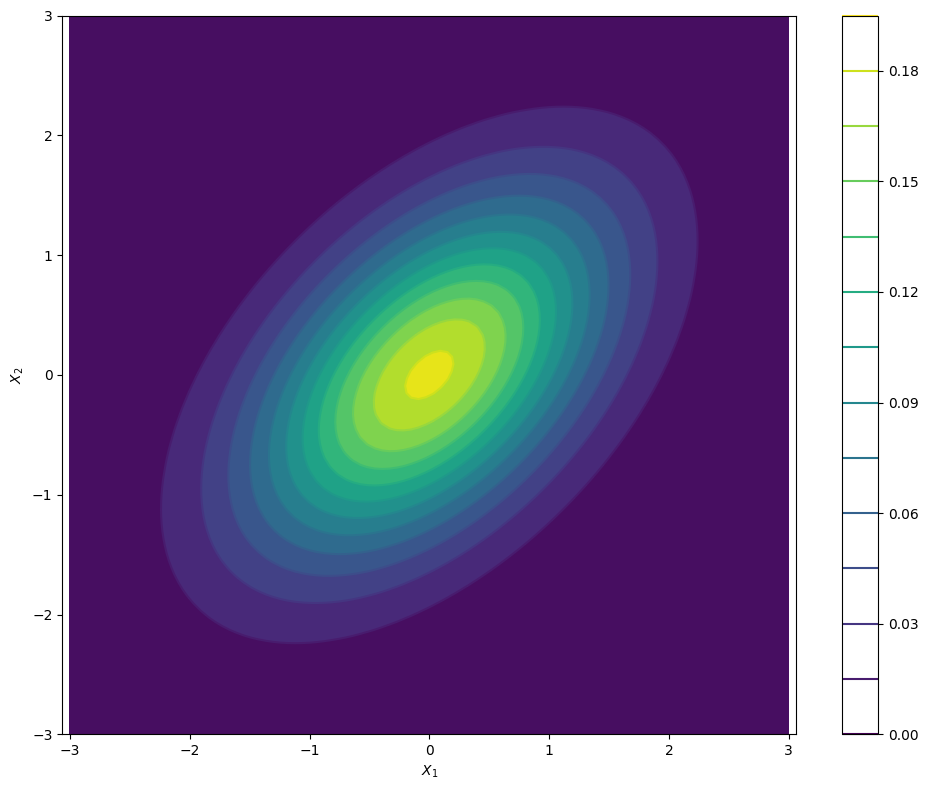

In [ ]:
plt.figure(figsize=(10, 8))

# Contour plot
contour = plt.contour(X, Y, Z, levels=15, cmap=cm.viridis)
plt.colorbar(contour)
plt.contourf(X, Y, Z, levels=15, cmap=cm.viridis)


plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')

plt.tight_layout()
plt.show()

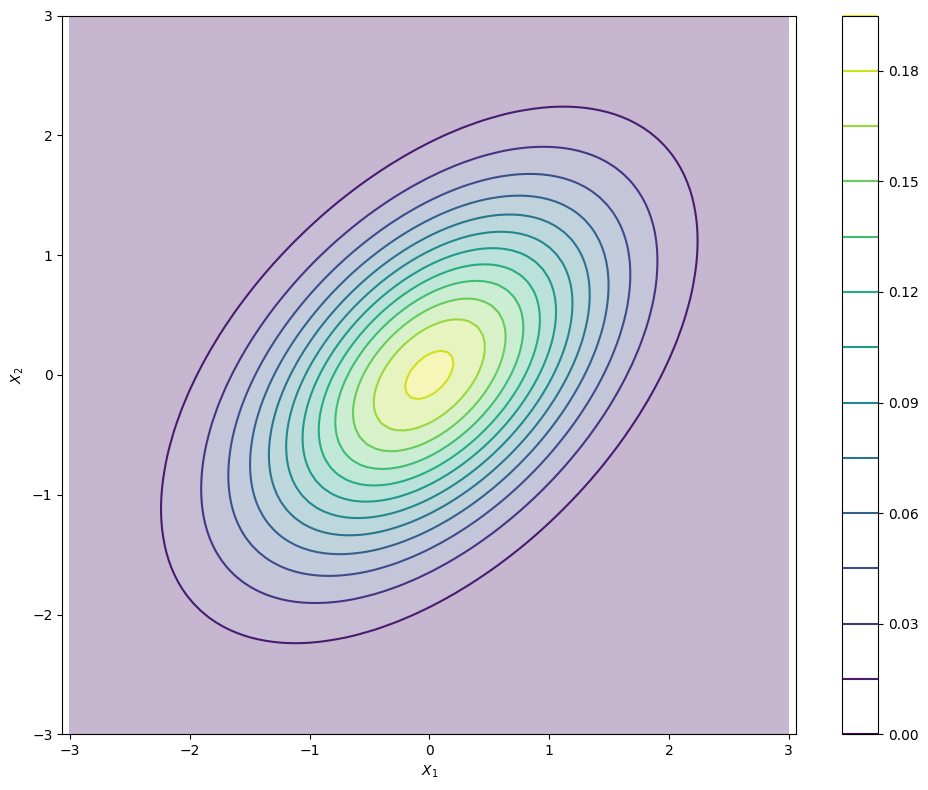

In [ ]:
plt.figure(figsize=(10, 8))

# Contour plot
contour = plt.contour(X, Y, Z, levels=15, cmap=cm.viridis)
plt.colorbar(contour)
plt.contourf(X, Y, Z, levels=15, cmap=cm.viridis, alpha=0.3)


plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')

plt.tight_layout()
plt.show()

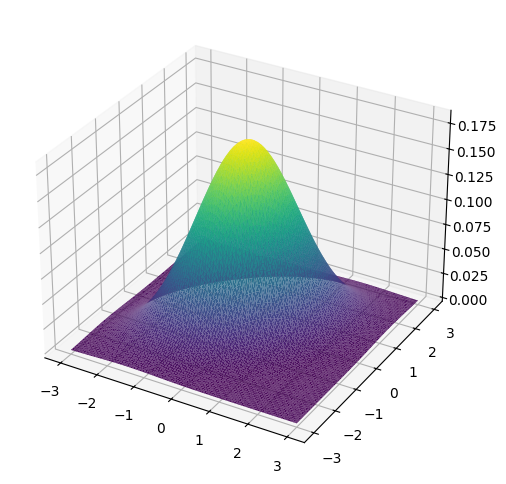

In [ ]:
# A 3D plot example
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis')  # Triangular surface

plt.show()


In [ ]:
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])
fig.show()

Recall that previously we wanted to visualize credibile intervals of 1D functions. We can do something similar for 2D functions

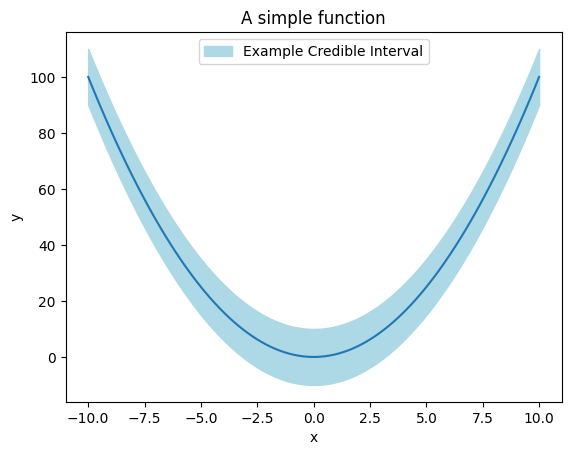

In [ ]:
lower = Z - 0.10
upper = Z + 0.10

In [ ]:
# Create interactive 3D surface
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

fig.add_trace(go.Surface(z=upper, x=X, y=Y, opacity=0.3, colorscale='gray', showscale=False))
fig.add_trace(go.Surface(z=lower, x=X, y=Y, opacity=0.3, colorscale='gray', showscale=False))


# Show interactive plot
fig.show()